**[LeetCode Link](https://leetcode-cn.com/problems/count-complete-tree-nodes/solution/wan-quan-er-cha-shu-de-jie-dian-ge-shu-by-leetcode/)**

## 递归
### 复杂度分析
* 时间复杂度：O(N)。
* 空间复杂度：O(d)=O(logN)，其中 d 指的是树的的高度，运行过程中堆栈所使用的空间。

In [ ]:
class Solution:
    def countNodes(self, root: TreeNode) -> int:
        return 1 + self.countNodes(root.right) + self.countNodes(root.left) if root else 0

## 二分搜索
* 完全二叉树中，除了最后一层外，其余每层节点都是满的，并且最后一层的节点全部靠向左边。
* 这说明如果第 k 层不是最后一层，则在第 k 层中将有 2^k 个节点。由于最后一层可能没有完全填充，则节点数在 1 到 2^d 之间，其中 d 指的是树的高度。

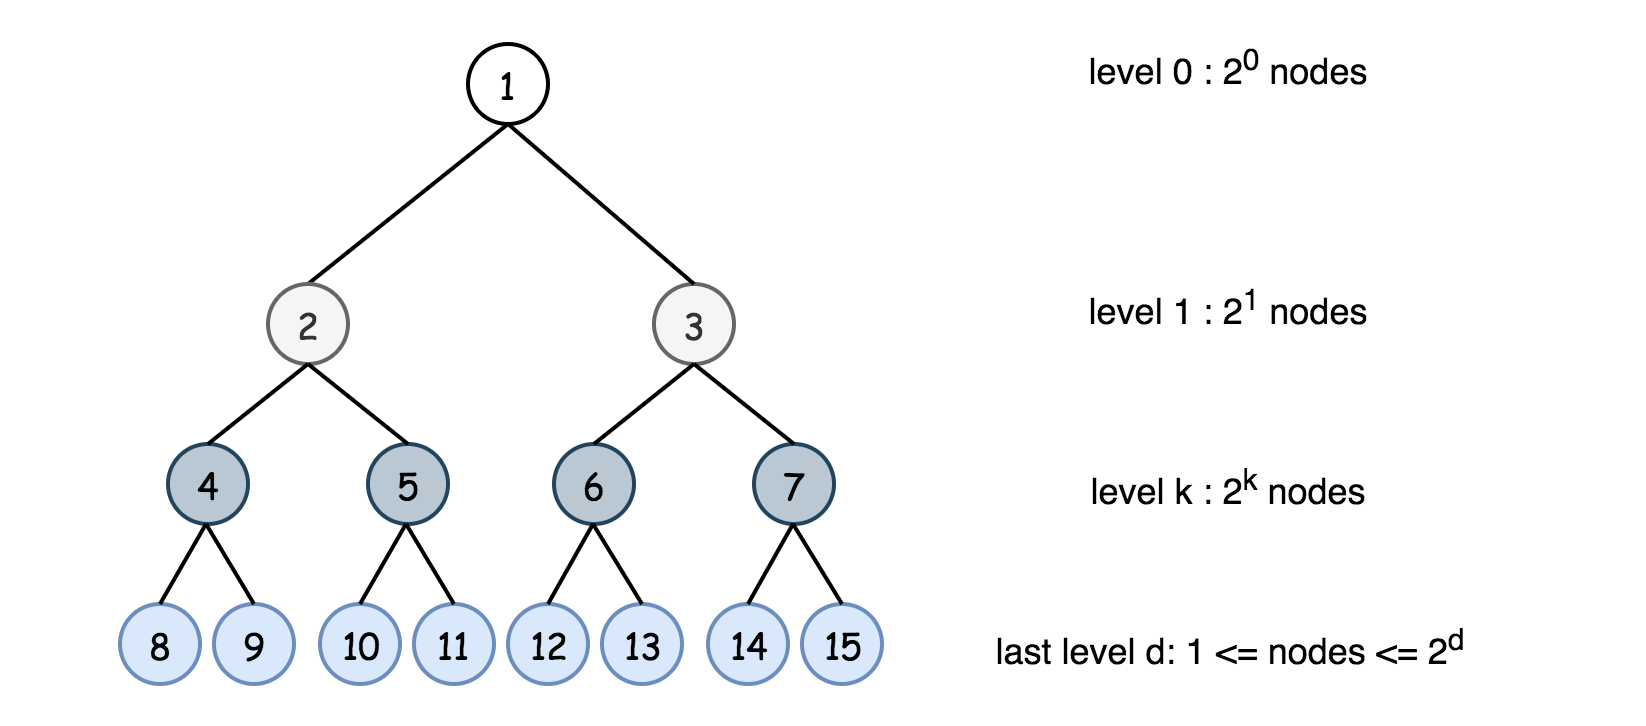
我们可以直接计算除了最后一层以外的所有结点个数： $\sum_{k=0}^{k=d-1} 2^{k}=2^{d}-1$ 。那么我们可以将问题简化为计算完全二叉树最后一层有多少个节点。
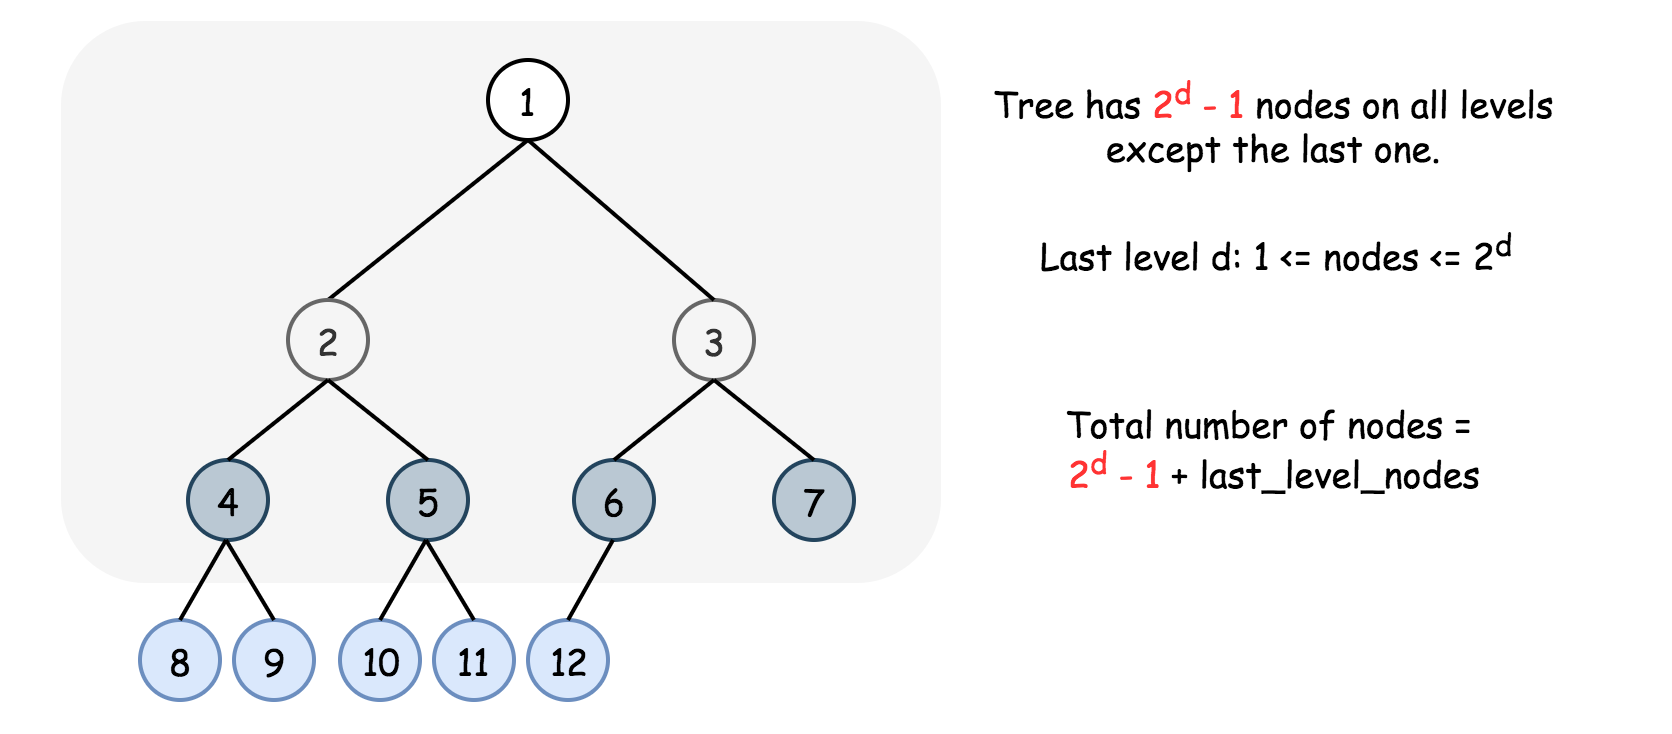

**现在有两个问题：**
    * 最后一层我们需要检查多少个节点？
    * 一次检查的最佳的时间性能是什么？

* 让我们从第一个问题开始思考。最后一层的叶子节点全部靠向左边，我们可以用二分搜索只检查 $\log \left(2^{d}\right)=d$ 个叶子代替检查全部叶子。
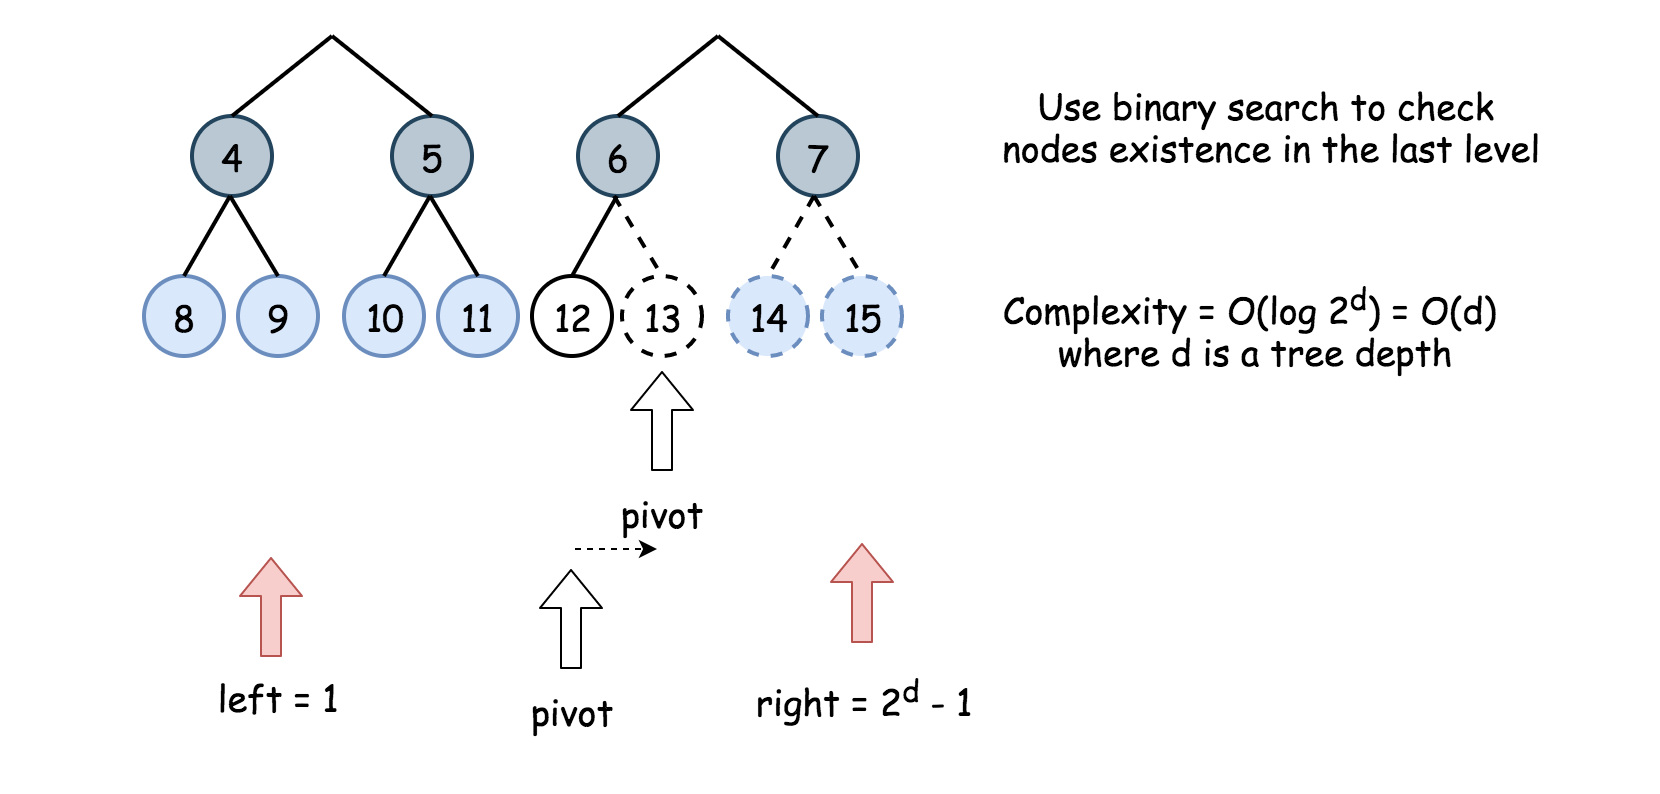
* 让我们思考第二个问题，最后一层的叶子节点索引在 0 到 $2^d - 1$ 之间。如何检查第 idx 节点是否存在？让我们来用二分搜索来构造从根节点到 idx 的移动序列。如，idx = 4。idx 位于 0,1,2,3,4,5,6,7 的后半部分，因此第一步是向右移动；然后 idx 位于 4,5,6,7 的前半部分，因此第二部是向左移动；idx 位于 4,5 的前半部分，因此下一步是向左移动。一次检查的时间复杂度为 $\mathcal{O}\left(d\right)$。
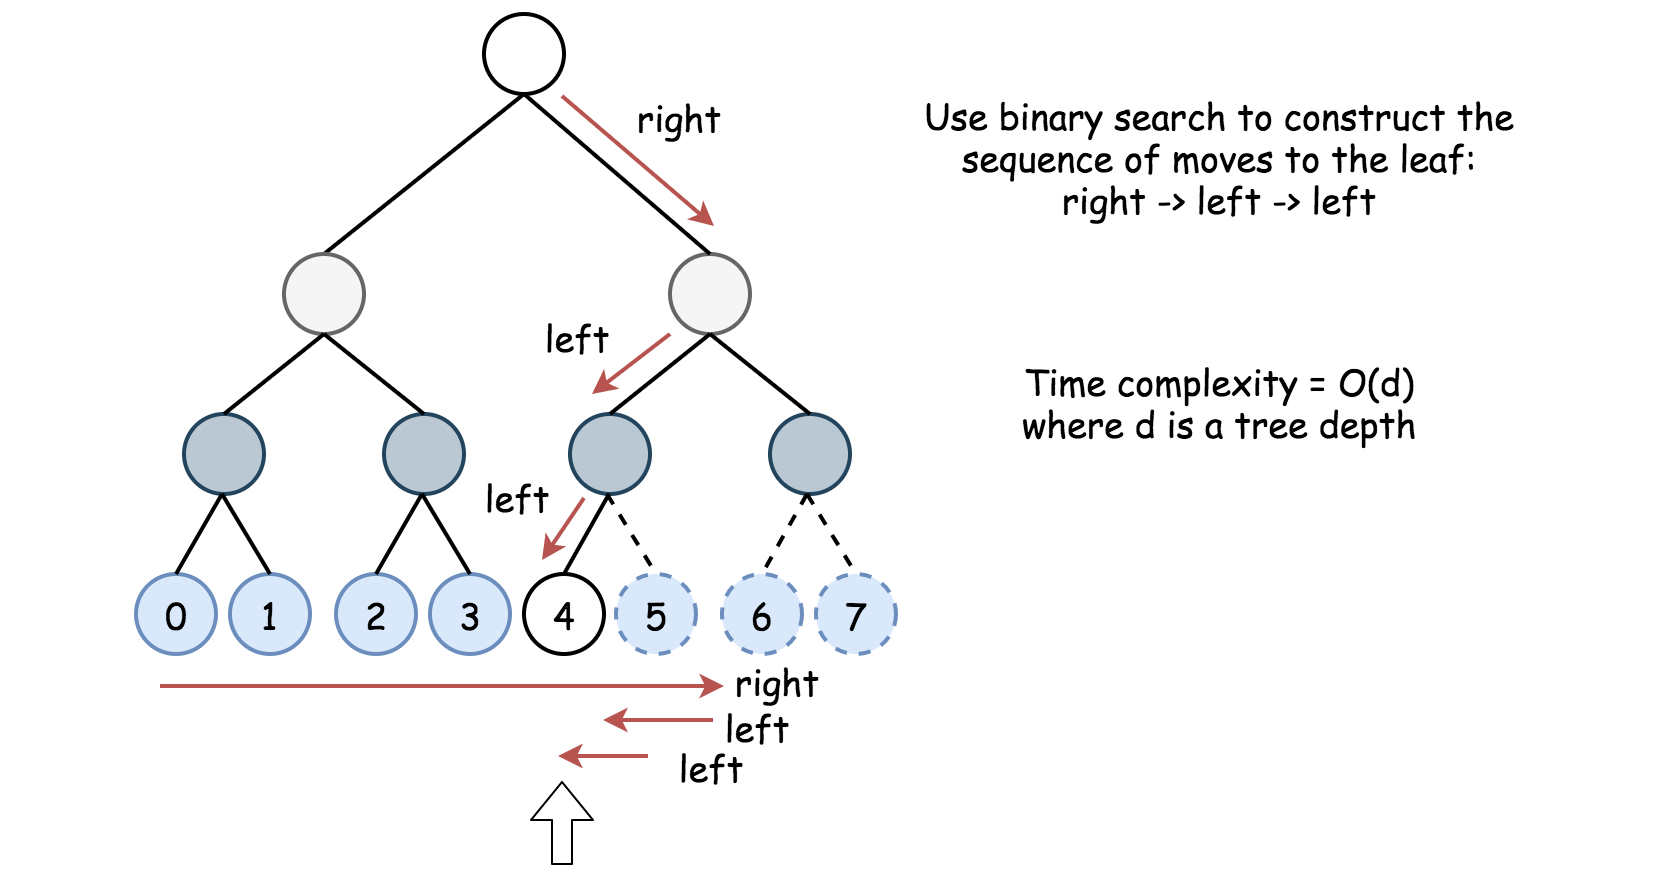
我们需要 $\mathcal{O}\left(d\right)$ 次检查，一次检查需要 $\mathcal{O}\left(d\right)$，所以总的时间复杂度为 $\mathcal{O}\left(d^{2}\right)$。

### 算法
* 如果树为空，返回 0。
* 计算树的高度 d。
* 如果 d == 0，返回 1。
* 除最后一层以外的所有节点数为 2^d-1。最后一层的节点数通过二分搜索，检查最后一层有多少个节点。使用函数 ```exists(idx, d, root)``` 检查第 idx 节点是否存在。
* 使用二分搜索实现 exists(idx, d, root)。
* 返回 2^d - 1 + 最后一层的节点数。

### 复杂度分析
* 时间复杂度：$\mathcal{O}\left(d^{2}\right)=\mathcal{O}\left(\log ^{2} N\right)$，其中 d 指的是树的高度。
* 空间复杂度：$\mathcal{O}\left(1\right)$。


In [ ]:
class Solution:
    def exists(self, idx: int, d: int, node: TreeNode) -> bool:
        """
        Last level nodes are enumerated from 0 to 2**d - 1 (left -> right).
        Return True if last level node idx exists. 
        Binary search with O(d) complexity.
        """
        left, right = 0, 2**d - 1
        for _ in range(d):
            pivot = left + (right - left) // 2
            if idx <= pivot:
                node = node.left
                right = pivot
            else:
                node = node.right
                left = pivot + 1
        return node is not None
        
    def countNodes(self, root: TreeNode) -> int:
        # if the tree is empty
        if not root:
            return 0
                
        d = 0
        while node.left:
            node = node.left
            d += 1
        
        # if the tree contains 1 node
        if d == 0:
            return 1
        
        # Last level nodes are enumerated from 0 to 2**d - 1 (left -> right).
        # Perform binary search to check how many nodes exist.
        left, right = 1, 2**d - 1
        while left <= right:
            pivot = left + (right - left) // 2
            if self.exists(pivot, d, root):
                left = pivot + 1
            else:
                right = pivot - 1
        
        # The tree contains 2**d - 1 nodes on the first (d - 1) levels
        # and left nodes on the last level.
        return (2**d - 1) + left